<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Fundamento_Cuaderno_17_k_medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="blue">Cuaderno 17. K-Medoids </font>

##Introduccion

K-Medoids es un algoritmo de clustering similar a K-Means, pero en lugar de usar la media para definir el centroide de un cluster, utiliza el punto más representativo (medoid) de cada grupo. Este enfoque hace que K-Medoids sea más robusto frente a valores atípicos o ruido en los datos, ya que se basa en distancias reales en lugar de promedios.

![image](https://github.com/adiacla/bigdata/blob/master/kmedoids.png?raw=true)

Diferencia entre Kmedoids y Kmeans. (n.d.). Gráfico representativo del análisis de datos. Imagen. Recuperado de https://i.sstatic.net/ytx3W.png

Como se observa en la imagen el centroide de Kmedoids varia con respecto al Kmeans y que este (el centroide) debe ser un punto (un sample) de los datos, mientras que Kmeans es un punto calculado con la media

##Ventajas de K-Medoids

**Robustez ante valores atípicos:**
- Los centroides en K-Means pueden desplazarse significativamente debido a valores extremos, mientras que K-Medoids no se ve afectado por esto.

**Interpretación más intuitiva:**
- Los medoids son puntos reales del conjunto de datos, lo que facilita su análisis y comprensión.

**Generalidad:**
- Es más adecuado para datos categóricos y métricas de distancia no euclidianas.


##Desventajas de K-Medoids

**Mayor complejidad computacional:** El cálculo del medoid para cada cluster es más costoso que calcular la media.

**Escalabilidad limitada:** No es ideal para conjuntos de datos muy grandes debido a su tiempo de ejecución más largo.

**Menor eficiencia en algunos casos:** En datos con alta dimensionalidad, puede ser menos eficiente que K-Means.

##Modelo Matemático de K-Medoids

**Objetivo:** Minimizar el costo total definido como la suma de distancias entre cada punto y el medoid asignado.

$$
\text{Cost} = \sum_{i=1}^{n} \sum_{j=1}^{k} \delta(x_i, m_j)
$$
Donde:

- $x_i$: Punto de datos.
- $m_j$: Medoid del cluster \( j \).
- $\delta(x_i, m_j)$: Distancia entre el punto de datos $x_i$ y el medoid $m_j$.


Definición del medoid:

El medoid  $m_j$  se define como el punto dentro del cluster que minimiza la distancia total a los demás puntos del mismo cluster.

**Iteración:**

Asignar cada punto al cluster cuyo medoid esté más cerca.
Recalcular los medoids en cada iteración hasta que no haya cambios significativos.


##Taller Clustering de Clientes con K-Medoids

Vamos a relizar el mismo taller de clusterizacion de Kmeans usando Kmedoids y verficar la diferencia. El algoritmo K-medoids lo descargamos de la clase KMedoids de la librería sklearn_extra. Dado que las librerias no están preinstaladas debemos ajustar a las versiones y dependencias requeridas.

In [1]:
import numpy
import sklearn

print("numpy version:", numpy.__version__)
print("scikit-learn version:", sklearn.__version__)


numpy version: 2.0.2
scikit-learn version: 1.6.1


In [2]:
!pip uninstall numpy scikit-learn scikit-learn-extra -y
!pip install numpy==1.26.4 scikit-learn==1.3.2 scikit-learn-extra==0.3.0



Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


## Cargar y Preprocesar los Datos

Este bloque de código realiza una serie de pasos fundamentales para cargar, procesar y visualizar un conjunto de datos. A continuación, explico cada paso del código proporcionado.

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Shopping_CustomerData.csv"
data = pd.read_csv(url)

data

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        200 non-null    int64  
 1   Genero    200 non-null    object 
 2   Edad      200 non-null    int64  
 3   Ciudad    200 non-null    object 
 4   Ingresos  200 non-null    float64
 5   Credito   200 non-null    int64  
 6   gastos    200 non-null    int64  
 7   trabajo   200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [3]:
data.Ciudad=data.Ciudad.astype('category')

##Verificar que no tenga outlier

El código genera un gráfico de caja y bigotes (boxplot) para las columnas numéricas del conjunto de datos.

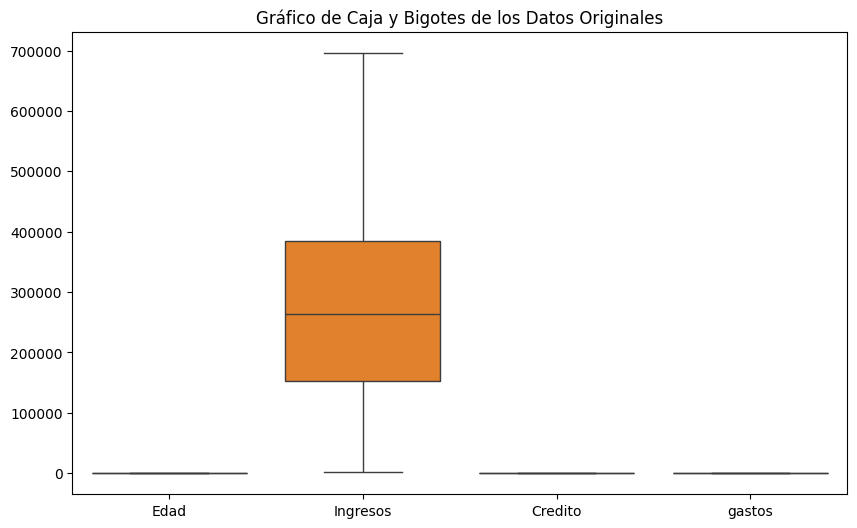

In [4]:
# Seleccionar solo las columnas numéricas
numerical_data = data[['Edad', 'Ingresos', 'Credito', 'gastos']]

# Crear el gráfico de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data)
plt.title('Gráfico de Caja y Bigotes de los Datos Originales')
plt.show()

##Codificar la variable 'Genero' (Male = 0, Female = 1):

Primero, se codifica la variable categórica 'Genero' (Male = 0, Female = 1) para convertirla en una forma numérica. Luego, se selecciona las columnas numéricas relevantes para el análisis (Edad, Ingresos, Credito, Gastos, Trabajo, y Genero) y se eliminna las no necesarias, como ID y Ciudad.

A continuación, normalizamos los datos utilizando el StandardScaler de scikit-learn, asegurando que todas las variables tengan la misma escala (media 0 y desviación estándar 1).
Esto es crucial para que ninguna variable, como Ingresos, domine las distancias calculadas en el algoritmo K-means. El resultado es un conjunto de datos listos para ser procesados y segmentados en grupos utilizando técnicas de clustering.

In [5]:
# Preprocesamiento: Codificar 'Genero' usando labelencoder de sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genero'] = label_encoder.fit_transform(data['Genero'])

data


,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo
0,1001,1,49,Bengaluru,527547.58850,653,78,1
1,1002,1,59,Bengaluru,207143.19760,630,63,1
2,1003,0,54,Delhi,164423.84570,555,69,4
3,1004,0,42,Bengaluru,56220.36443,699,30,1
4,1005,0,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,0,54,Delhi,317466.42070,601,52,4
196,1197,0,20,Bengaluru,323305.50020,554,58,1
197,1198,1,44,Chennai,109058.54430,844,36,2
198,1199,1,28,Delhi,160116.89300,837,24,4


In [6]:
#Mostar el atributo que uso para la codificación
label_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [7]:
#filtrar solo las columnas numericas
from sklearn.preprocessing import MinMaxScaler

data_numeric=data[['Edad', 'Ingresos', 'Credito', 'gastos',"Genero"]]
# Escalar los datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

df_scaled=pd.DataFrame(data_scaled,columns=['Edad', 'Ingresos', 'Credito', 'gastos',"Genero"])
df_scaled

,Edad,Ingresos,Credito,gastos,Genero
0,0.543860,0.757719,0.294798,0.775510,1.0
1,0.719298,0.295262,0.228324,0.622449,1.0
2,0.631579,0.233602,0.011561,0.683673,0.0
3,0.421053,0.077426,0.427746,0.285714,0.0
4,0.210526,0.366060,0.699422,0.040816,0.0
...,...,...,...,...,...
195,0.631579,0.454497,0.144509,0.510204,0.0
196,0.035088,0.462925,0.008671,0.571429,0.0
197,0.456140,0.153691,0.846821,0.346939,1.0
198,0.175439,0.227386,0.826590,0.224490,1.0


In [8]:
data_numeric.columns

Index(['Edad', 'Ingresos', 'Credito', 'gastos', 'Genero'], dtype='object')

In [9]:
#Darle persistencia a scaler y a labelencder
import joblib as jb
jb.dump(scaler,"scaler.bin")
jb.dump(label_encoder,"labelencoder.bin")

['labelencoder.bin']

## Aplicar el método del codo

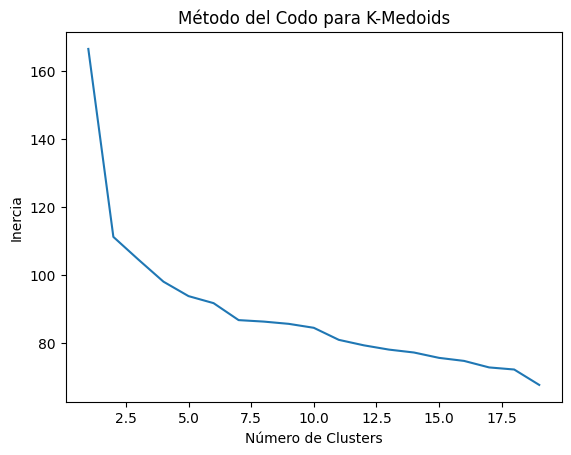

In [10]:
# Método del Codo: Calcular la inercia (suma de distancias dentro de los clusters)
inertia = []
for k in range(1, 20):  # Probar con diferentes números de clusters (k)
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data_scaled)
    inertia.append(kmedoids.inertia_)

# Graficar el método del codo
plt.plot(range(1, 20), inertia)
plt.title("Método del Codo para K-Medoids")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()


De acuerdo a los datos anteriores requerimos 2 o 7 cluster para tener los mejores indices de inercia y menor cantidad de clusteres.

##Aplicar el coeficiente silhouette

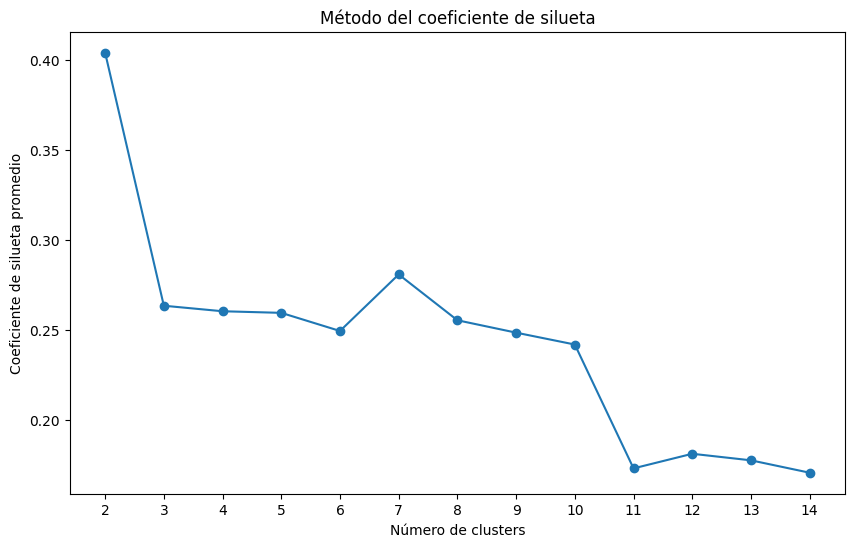

[0.40425735309164795,
 0.2636253942785898,
 0.26055664322716016,
 0.2596649741596579,
 0.2495921698214218,
 0.28101326344161914,
 0.25554223280606075,
 0.24865915450893475,
 0.2420524461018723,
 0.17321857530727525,
 0.1813319617771183,
 0.17769138866976153,
 0.17080103030338264]

In [11]:
from sklearn.metrics import silhouette_score

# Definir el rango de posibles números de clusters
range_clusters = range(2, 15)

# Lista para almacenar las puntuaciones de silueta
silhouette_scores = []

# Calcular el coeficiente de silueta para cada número de clusters
for k in range_clusters:
    kmeans = KMedoids(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el promedio del coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Método del coeficiente de silueta")
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de silueta promedio")
plt.xticks(range_clusters)
plt.show()

silhouette_scores

Dado que los valores k recomedados son 2 y 7, para efectos de este ejercicio vamos a usar 7, pero k que mas coeficiente de silhouette tiene es el 2.

In [12]:
#Convertir a numpy array para manejo fácil
scores_array = np.array(silhouette_scores)

# Obtener índices ordenados de mayor a menor
sorted_indices = scores_array.argsort()[::-1]

# Excluir el primero (el mejor) y tomar los siguientes dos
second_and_third_best_indices = sorted_indices[0:5]

# Mostrar los índices y valores correspondientes
for idx in second_and_third_best_indices:
    print(f"Número de grupos: {idx + 2}, Silhouette Score: {silhouette_scores[idx]:.4f}")

Número de grupos: 2, Silhouette Score: 0.4043
Número de grupos: 7, Silhouette Score: 0.2810
Número de grupos: 3, Silhouette Score: 0.2636
Número de grupos: 4, Silhouette Score: 0.2606
Número de grupos: 5, Silhouette Score: 0.2597


Aqui en este modelo nos recomienda 2 clusteres y el segundo es el de 7 k

In [13]:
# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=7, random_state=42, metric='euclidean')
data['Cluster'] = kmedoids.fit_predict(data_scaled)

#Imprmir los centriodes
print(kmedoids.cluster_centers_)

[[0.38596491 0.60851248 0.64450867 0.83673469 0.        ]
 [0.64912281 0.63649333 0.28034682 0.39795918 0.        ]
 [0.70175439 0.21505199 0.62427746 0.44897959 0.        ]
 [0.26315789 0.39930479 0.79768786 0.23469388 0.        ]
 [0.56140351 0.42872279 0.43352601 0.40816327 1.        ]
 [0.33333333 0.20254949 0.24855491 0.28571429 0.        ]
 [0.52631579 0.2550325  0.34104046 0.96938776 0.        ]]


In [14]:
data

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo,Cluster
0,1001,1,49,Bengaluru,527547.58850,653,78,1,4
1,1002,1,59,Bengaluru,207143.19760,630,63,1,4
2,1003,0,54,Delhi,164423.84570,555,69,4,6
3,1004,0,42,Bengaluru,56220.36443,699,30,1,5
4,1005,0,30,Bengaluru,256194.36190,793,6,1,3
...,...,...,...,...,...,...,...,...,...
195,1196,0,54,Delhi,317466.42070,601,52,4,1
196,1197,0,20,Bengaluru,323305.50020,554,58,1,5
197,1198,1,44,Chennai,109058.54430,844,36,2,4
198,1199,1,28,Delhi,160116.89300,837,24,4,4


In [15]:
#Desnormalizar los centroides

medoids = scaler.inverse_transform(kmedoids.cluster_centers_)
medoids=pd.DataFrame(medoids, columns=['Edad', 'Ingresos', 'Credito', 'gastos', 'Genero'])
print(medoids)

   Edad     Ingresos  Credito  gastos  Genero
0  40.0  424172.7786    774.0    84.0     0.0
1  55.0  443558.7535    648.0    41.0     0.0
2  58.0  151571.5328    767.0    46.0     0.0
3  33.0  279227.4118    827.0    25.0     0.0
4  50.0  299609.0836    701.0    42.0     1.0
5  37.0  142909.4261    637.0    30.0     0.0
6  48.0  179271.2332    669.0    97.0     0.0


La siguiente gráfica no muestra que no es fácil separar visualmente grupos usando dos features, y que este modelo es de multiples variables, a pesar de que veamos ciertas tendencias de ubicación de los clústeres.

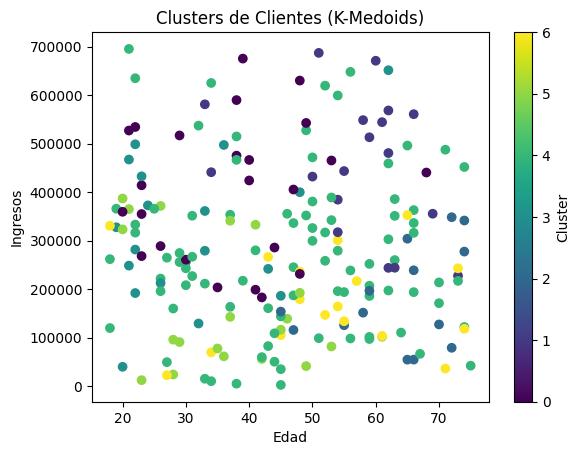

In [16]:

# Visualizar clusters con 'Edad' e 'Ingresos'
plt.scatter(data['Edad'], data['Ingresos'], c=data['Cluster'], cmap='viridis')
plt.title("Clusters de Clientes (K-Medoids)")
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score
# Coeficiente de Silueta para evaluar la calidad de los clusters
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f"El coeficiente de silueta promedio es: {silhouette_avg}")

El coeficiente de silueta promedio es: 0.28101326344161914


In [18]:
# Cambiar el ttipo de categoría
data.Cluster = data.Cluster.astype('category')

In [19]:
data.Cluster.value_counts()

,count
Cluster,
4,88
0,24
5,20
3,19
1,18
6,17
2,14


## **Análisis:**

Cluster 0
Edad: 40 años

Ingresos: $424,173

Crédito: 774

Gastos: 84

Género predominante: Mujeres (0)

🧠 Perfil:
Mujeres de mediana edad con ingresos altos, buen score de crédito, y gasto alto.

🏷️ Nombre sugerido: "Mujeres Profesionales Estables"

📈 Estrategia comercial:

Ofrecer productos de inversión y ahorro a mediano-largo plazo.

Promocionar tarjetas premium con beneficios de viajes o cashback.

Programas de fidelidad y asesoría financiera personalizada.

Enfoque en seguros de vida y salud.

Cluster 1
Edad: 55 años

Ingresos: $443,559

Crédito: 648

Gastos: 41

Género predominante: Mujeres (0)

🧠 Perfil:
Mujeres mayores con ingresos muy altos, score de crédito más bajo, y gastos moderados.

🏷️ Nombre sugerido: "Prejubiladas Conservadoras"

📈 Estrategia comercial:

Promover planes de retiro, pensiones y seguros.

Productos con baja exposición al riesgo (depósitos a plazo, fondos conservadores).

Mejorar el score crediticio con productos educativos.

Incentivos para aumentar el gasto controlado con beneficios exclusivos.

Cluster 2
Edad: 58 años

Ingresos: $151,572

Crédito: 767

Gastos: 46

Género predominante: Mujeres (0)

🧠 Perfil:
Mujeres mayores con ingresos medios, buen score de crédito, y gasto moderado.

🏷️ Nombre sugerido: "Ahorradoras Cautelosas"

📈 Estrategia comercial:

Cuentas de ahorro con beneficios.

Microinversiones o fondos de bajo riesgo.

Educación financiera para optimizar su retiro.

Productos con descuentos por antigüedad o fidelidad.

Cluster 3
Edad: 33 años

Ingresos: $279,227

Crédito: 827

Gastos: 25

Género predominante: Mujeres (0)

🧠 Perfil:
Mujeres jóvenes-adultas con ingresos buenos, excelente score crediticio, y bajo gasto.

🏷️ Nombre sugerido: "Jóvenes Precavidas"

📈 Estrategia comercial:

Ofrecer créditos hipotecarios o educativos.

Incentivar el gasto responsable mediante recompensas.

Tarjetas con beneficios en estilo de vida (moda, viajes, tech).

Productos financieros con beneficios por comportamiento crediticio ejemplar.

Cluster 4
Edad: 50 años

Ingresos: $299,609

Crédito: 701

Gastos: 42

Género predominante: Hombres (1)

🧠 Perfil:
Hombres maduros con ingresos altos, crédito decente y gasto medio.

🏷️ Nombre sugerido: "Hombres Ejecutivos Estables"

📈 Estrategia comercial:

Paquetes premium de servicios bancarios.

Inversiones diversificadas (fondos, acciones).

Beneficios personalizados en tarjetas de crédito.

Servicios bancarios con atención exclusiva o ejecutiva.

Cluster 5
Edad: 37 años

Ingresos: $142,909

Crédito: 637

Gastos: 30

Género predominante: Mujeres (0)

🧠 Perfil:
Mujeres jóvenes con ingresos bajos, bajo crédito, y gastos bajos.

🏷️ Nombre sugerido: "Emprendedoras en Crecimiento"

📈 Estrategia comercial:

Educación financiera y mejora del historial crediticio.

Microcréditos para emprendimientos.

Programas de lealtad e incentivos por uso responsable.

Paquetes bancarios sin comisiones o con beneficios iniciales.

Cluster 6
Edad: 48 años

Ingresos: $179,271

Crédito: 669

Gastos: 97

Género predominante: Mujeres (0)

🧠 Perfil:
Mujeres de mediana edad, ingresos medios, gasto alto, crédito moderado.

🏷️ Nombre sugerido: "Consumidoras Activas"

📈 Estrategia comercial:

Programas de cashback o recompensas por gasto frecuente.

Ofertas personalizadas según patrones de consumo.

Mejora del crédito a través de tarjetas con límites controlados.

Promoción cruzada con marcas de consumo masivo.



##**Conclusión Final:**

A partir de los análisis de los centroides de los clusters, puedes observar que cada grupo tiene diferentes combinaciones de edad, ingresos, crédito, gastos y género. Los nombres propuestos para cada cluster reflejan estas características, lo que te permitirá interpretar los datos de manera más sencilla y descriptiva.